# 홀스 선형지수 평활법

- 평활법 : 가중평균을 둠(최근의 자료에 가중치를 더 둠)
- 자료의평활(알파라는 파라미터관련 수식) + 추세의평활(베타라는 파라미터관련 수식) 로 구성 알파,베타값은 평균제곱오차(SSE)로 추정

In [1]:
library(fpp2)

Loading required package: ggplot2

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth



In [2]:
ausair

A Time Series:
 [1]  7.31870  7.32660  7.79560  9.38460 10.66470 11.05510 10.86430 11.30650
 [9] 12.12230 13.02250 13.64880 13.21950 13.18790 12.60150 13.23680 14.41210
[17] 15.49730 16.88020 18.81630 15.11430 17.55340 21.86010 23.88660 26.92930
[25] 26.88850 28.83140 30.07510 30.95350 30.18570 31.57970 32.57757 33.47740
[33] 39.02158 41.38643 41.59655 44.65732 46.95177 48.72884 51.48843 50.02697
[41] 60.64091 63.36031 66.35527 68.19795 68.12324 69.77935 72.59770

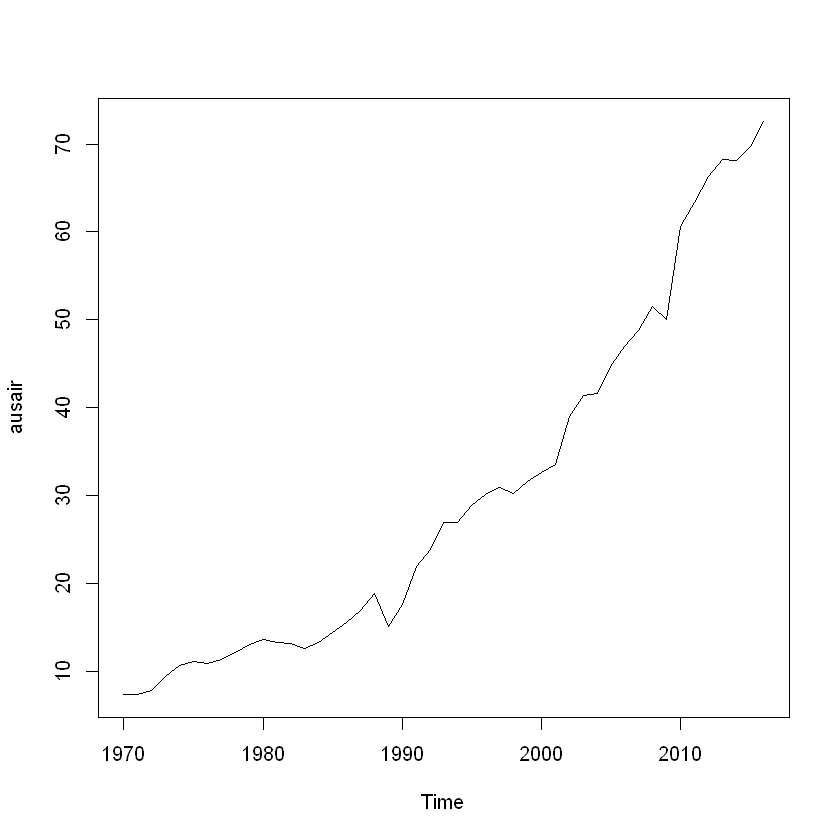

In [3]:
plot(ausair)

In [4]:
# 1990년도 데이터부터 끊고 예측해보기 
air_ts<-window(ausair, start=1990)
air_ts

A Time Series:
 [1] 17.55340 21.86010 23.88660 26.92930 26.88850 28.83140 30.07510 30.95350
 [9] 30.18570 31.57970 32.57757 33.47740 39.02158 41.38643 41.59655 44.65732
[17] 46.95177 48.72884 51.48843 50.02697 60.64091 63.36031 66.35527 68.19795
[25] 68.12324 69.77935 72.59770

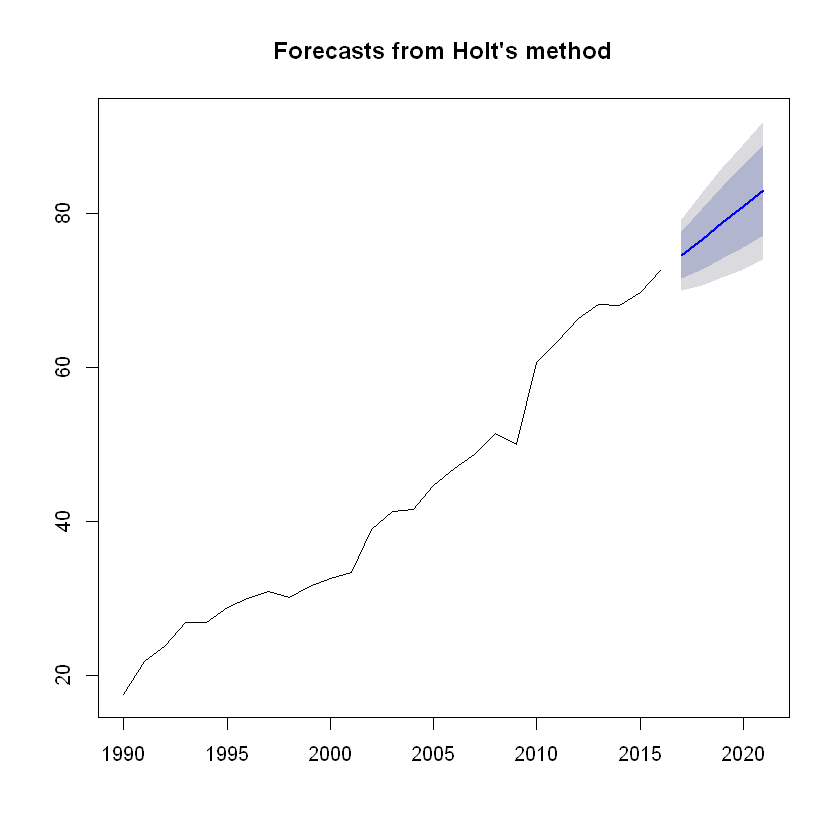

In [5]:
air_holt<-holt(air_ts, h=5)
plot(air_holt)

In [6]:
# air_holt의 변수확인
names(air_holt)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

In [7]:
air_holt$model

Holt's method 

Call:
 holt(y = air_ts, h = 5) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

In [11]:
air_ts
air_holt$fitted

A Time Series:
 [1] 17.55340 21.86010 23.88660 26.92930 26.88850 28.83140 30.07510 30.95350
 [9] 30.18570 31.57970 32.57757 33.47740 39.02158 41.38643 41.59655 44.65732
[17] 46.95177 48.72884 51.48843 50.02697 60.64091 63.36031 66.35527 68.19795
[25] 68.12324 69.77935 72.59770

A Time Series:
 [1] 17.67324 19.67545 23.59111 25.93838 28.86311 29.32561 31.01711 32.33675
 [9] 33.28993 32.81401 33.89040 34.90147 35.82005 40.57920 43.35064 43.99546
[17] 46.64611 49.00107 50.87622 53.48571 52.71508 61.39691 65.12882 68.24903
[25] 70.30861 70.59604 72.01969

In [13]:
# 자료평활(level)값과 추세평활(b)값 출력 -> 이 두개를 합한 것이 fitted값으로 감!
air_holt$model$states
air_holt$fitted

,l,b
1989,15.57152,2.101717
1990,17.57375,2.101705
1991,21.48918,2.101924
1992,23.83643,2.101953
1993,26.76106,2.102052
1994,27.22376,2.101855
1995,28.91531,2.101805
1996,30.23504,2.101711
1997,31.18835,2.101573
1998,30.71275,2.101262


A Time Series:
 [1] 17.67324 19.67545 23.59111 25.93838 28.86311 29.32561 31.01711 32.33675
 [9] 33.28993 32.81401 33.89040 34.90147 35.82005 40.57920 43.35064 43.99546
[17] 46.64611 49.00107 50.87622 53.48571 52.71508 61.39691 65.12882 68.24903
[25] 70.30861 70.59604 72.01969

In [14]:
summary(air_holt)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = air_ts, h = 5) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

Error measures:
                      ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.008359331 2.182343 1.52892 -0.3244107 3.820787 0.6654839
                    ACF1
Training set -0.01335362

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017       74.60130 71.57106 77.63154 69.96695 79.23566
2018       76.70304 72.76440 80.64169 70.67941 82.72668
2019       78.80478 74.13092 83.47864 71.65673 85.95284
2020       80.90652 75.59817 86.21487 72.78810 89.02494
2021       83.00826 77.13343 88.88310 74.02348 91.99305


# holt의 damped=TRUE의 감쇠추세법!

- 미래의 값을 과하게 예측하는 것을 파라미터 값(phi값) 조정을 통해 방지하는 기법
- 만약 phi=1이면 holt 선형지수와 동일하게 예측함
- 그래서 보통 0.8<phi<1 범위의 값으로 사용

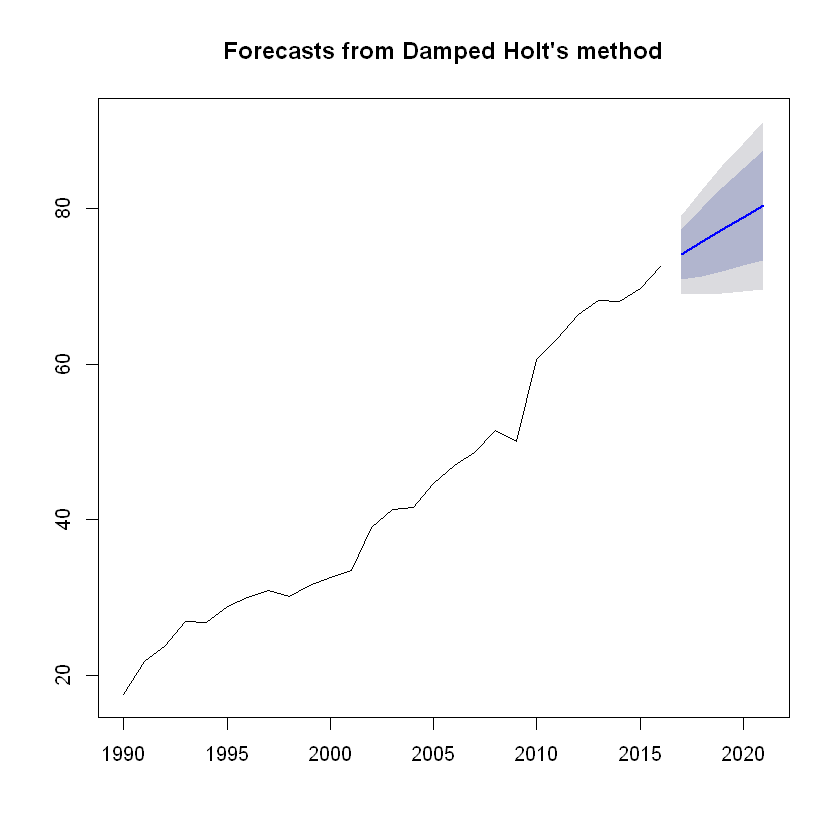


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = air_ts, h = 5, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.8691 
    beta  = 0.0409 
    phi   = 0.98 

  Initial states:
    l = 15.373 
    b = 2.2224 

  sigma:  2.532

     AIC     AICc      BIC 
145.6239 149.8239 153.3989 

Error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.3991511 2.285529 1.529037 0.560457 3.672339 0.6655348
                    ACF1
Training set -0.03143013

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017       74.10429 70.85945 77.34913 69.14174 79.06685
2018       75.72699 71.34160 80.11238 69.02012 82.43386
2019       77.31724 71.95975 82.67472 69.12367 85.51081
2020       78.87568 72.63402 85.11733 69.32989 88.42147
2021       80.40295 73.33096 87.47494 69.58727 91.21862


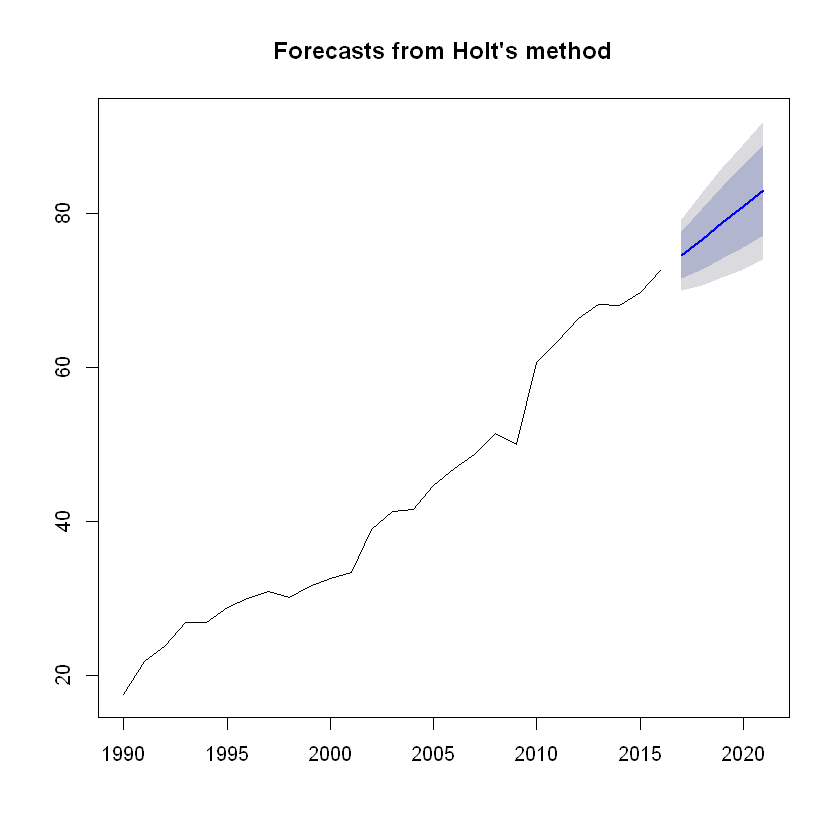

In [18]:
air_holt_d<-holt(air_ts, damped = TRUE, h=5)
plot(air_holt_d)
plot(air_holt)
summary(air_holt_d)

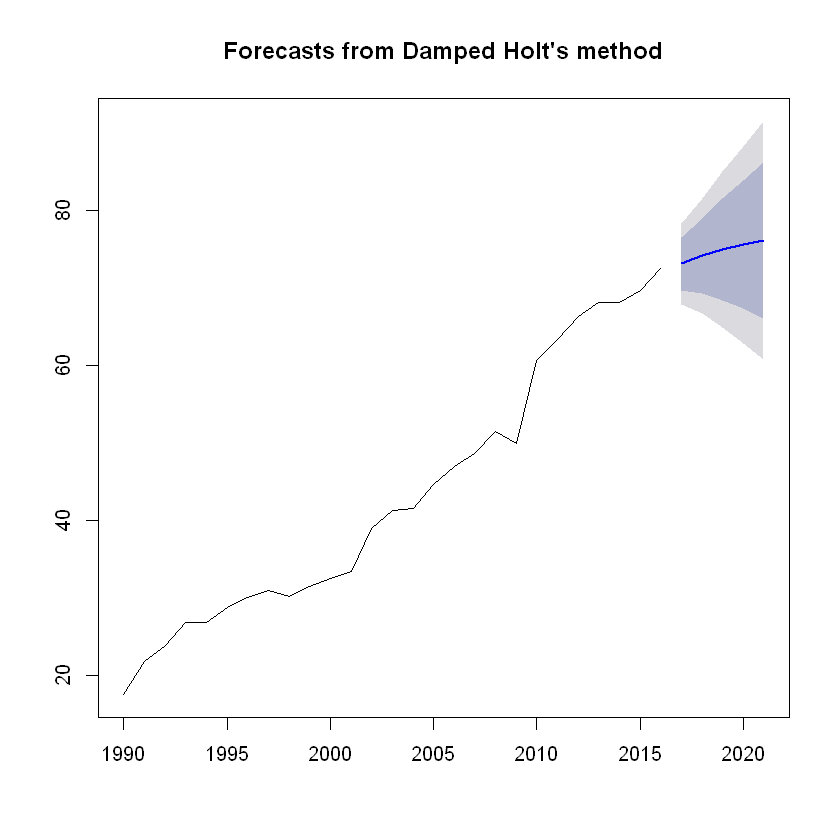

In [26]:
# phi값 조정해보기
# phi=0.8일 때
air_holt_d2<-holt(air_ts, damped = TRUE, phi=0.8,h=5)
plot(air_holt_d2)

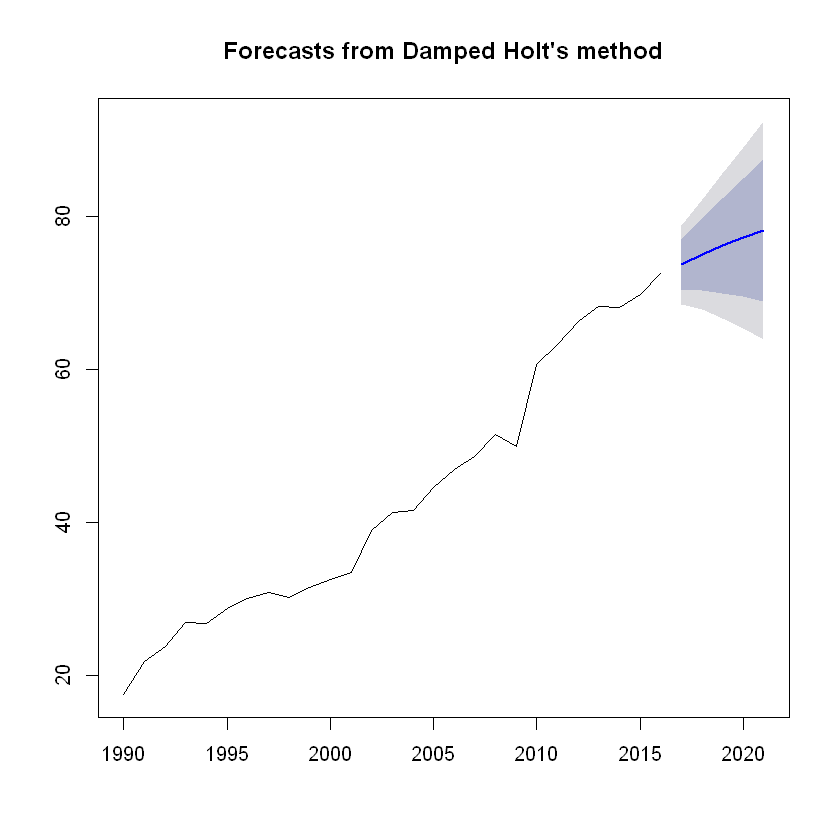

In [24]:
# phi=0.5일 때
air_holt_d3<-holt(air_ts, damped = TRUE, phi=0.9, h=5)
plot(air_holt_d3)

In [25]:
summary(air_holt_d2)
summary(air_holt_d3) # -> phi=0.9일때 RMSE값이 더 작음!


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = air_ts, h = 5, damped = TRUE, phi = 0.8) 

  Smoothing parameters:
    alpha = 0.6881 
    beta  = 0.4139 
    phi   = 0.8 

  Initial states:
    l = 13.1997 
    b = 5.7537 

  sigma:  2.6634

     AIC     AICc      BIC 
146.3567 149.2138 152.8358 

Error measures:
                    ME    RMSE      MAE      MPE     MAPE      MASE        ACF1
Training set 0.6642822 2.40417 1.546842 1.256405 3.520372 0.6732845 -0.06804795

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017       73.18517 69.77190 76.59845 67.96501 78.40533
2018       74.19811 69.32433 79.07189 66.74430 81.65192
2019       75.00846 68.45365 81.56326 64.98375 85.03317
2020       75.65674 67.34764 83.96583 62.94907 88.36440
2021       76.17536 66.10753 86.24318 60.77795 91.57277

Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = air_ts, h = 5, damped = TRUE

In [28]:
# phi=0.7일 때 -> 0.7아래 값들은 왜안되지..? !?!?!?!?!?!?!!?!?!?!!?
air_holt_d4<-holt(air_ts, damped = TRUE, phi=0.7, h=5)
plot(air_holt_d4)

[1] "Model: ETS(A,Ad,N)"


ERROR: Error in ets(x, "AAN", alpha = alpha, beta = beta, phi = phi, damped = damped, : No model able to be fitted
